In [16]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from collections import Counter
import matplotlib
from matplotlib.colors import ListedColormap
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

current_palette = sns.color_palette()
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

sns.set(rc={'figure.figsize':(10,4)}, font_scale=1.0, style='whitegrid', font='CMU Sans Serif')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def save_fig(ax, folder, suffix, format="pdf"):
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig(folder + suffix + "." + format)
    fig.clear()

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
locations = pd.read_csv(os.path.join("..", "eu_cities.csv"))
locations = locations[["city_ascii", "lng", "lat"]]
locations.rename(columns = {"city_ascii": "Client", "lng": "Longitude", "lat": "Latitude"}, inplace=True)

In [19]:
RESULTS_DIR = os.path.join("..", "results")
FILENAME = "results-"

In [20]:
df_paper = pd.DataFrame()

for experiment in ["cloud", "sat"]:
    for run in ["3"]: #for run in ["1", "2", "3"]:
        NAME = FILENAME + experiment + "-" + run
        files = os.listdir(os.path.join(".", RESULTS_DIR, NAME))

        df_experiment = pd.DataFrame()

        for f in files:
            if f.endswith("-history.csv"):
                client = f[2:-len(".ext4-history.csv")]
                # print(client)
                if client != "Bratislava":
                    continue
                df_client = pd.read_csv(os.path.join(".", RESULTS_DIR, NAME, f))
                df_client.dropna(inplace=True)
                df_run = df_client[["Timestamp", "Type", "Name", "50%", "90%", "Total Median Response Time", "Total Average Response Time"]].copy()

                df_run["Client"] = client
                df_run["Experiment"] = experiment
                df_run["Run"] = run
                df_run["Latitude"] = locations.loc[locations["Client"] == client, "Latitude"].values[0]
                df_run["Longitude"] = locations.loc[locations["Client"] == client, "Longitude"].values[0]
                df_experiment = df_experiment.append(df_run)

        df_experiment["Timestamp"] = df_experiment["Timestamp"] - min(df_experiment["Timestamp"])
        # start_time = max(df_experiment["Timestamp"]) - 1000
        # df_experiment = df_experiment[ (df_experiment["Timestamp"] >  start_time) & (df_experiment["Timestamp"] < start_time+900) ]
        # df_experiment["Timestamp"] = df_experiment["Timestamp"] - min(df_experiment["Timestamp"])

        df_paper = df_paper.append(df_experiment)

df_paper.head()


,Timestamp,Type,Name,50%,90%,Total Median Response Time,Total Average Response Time,Client,Experiment,Run,Latitude,Longitude
1,0.0,GET,/,0.0,0.0,408.0,408.0,Bratislava,cloud,3,48.1447,17.1128
2,0.0,GET,/auth/login/,0.0,0.0,122.0,122.0,Bratislava,cloud,3,48.1447,17.1128
4,1.0,GET,/,410.0,410.0,408.0,408.0,Bratislava,cloud,3,48.1447,17.1128
5,1.0,GET,/auth/login/,120.0,120.0,122.0,122.0,Bratislava,cloud,3,48.1447,17.1128
6,1.0,POST,/auth/login/,0.0,0.0,831.0,831.0,Bratislava,cloud,3,48.1447,17.1128


In [21]:
graph_df = df_paper[ ((df_paper["Name"] == "/public/") & (df_paper["Type"] == "GET")) | ((df_paper["Name"] == "/") & (df_paper["Type"] == "POST")) ]

<AxesSubplot:xlabel='Timestamp', ylabel='Total Median Response Time'>

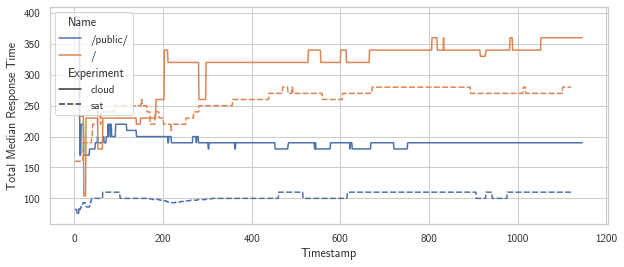

In [23]:
sns.lineplot(data=graph_df, x="Timestamp", y="Total Median Response Time", hue="Name", style="Experiment")